In [174]:
import cv2 as cv
import numpy as np
from matplotlib import image, pyplot as plt

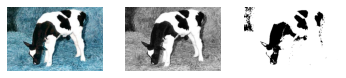

In [175]:
img = cv.imread("5.jpeg")
resized = cv.resize(img, (600,400))
gray = cv.cvtColor(resized,cv.COLOR_BGR2GRAY)
_,bin = cv.threshold(gray,40,255,cv.THRESH_BINARY)

srcs = [resized, gray, bin]
for index, img_index in enumerate(srcs):
    plt.subplot(3,3,index+1)
    plt.imshow(srcs[index],cmap='gray')
    plt.axis(False)
plt.show()

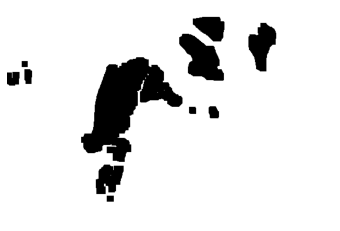

In [221]:
kernel = np.ones((3,3), np.uint8)
closing = cv.morphologyEx(bin,cv.MORPH_CLOSE,kernel, iterations = 5)

plt.imshow(closing, cmap='gray')
plt.axis(False)
plt.show()


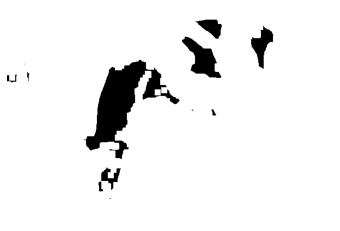

In [234]:
bg = cv.dilate(closing,kernel,iterations=5)

plt.imshow(bg, cmap='gray')
plt.axis(False)
plt.show()

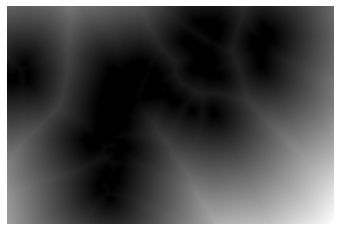

In [235]:
dist = cv.distanceTransform(bg,cv.DIST_L2,5)

plt.imshow(dist, cmap='gray')
plt.axis(False)
plt.show()

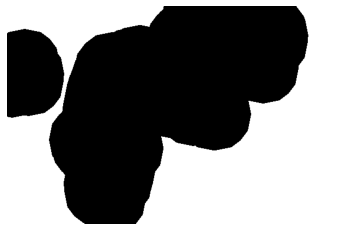

In [236]:
_,fg = cv.threshold(dist,0.22*dist.max(),255,0)

plt.imshow(fg, cmap='gray')
plt.axis(False)
plt.show()

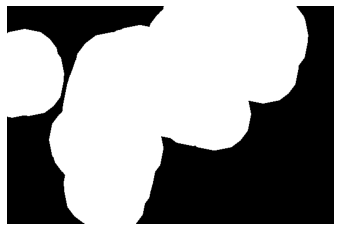

In [237]:
fg = np.uint8(fg)
plt.imshow(fg, cmap='binary')
plt.axis(False)
plt.show()

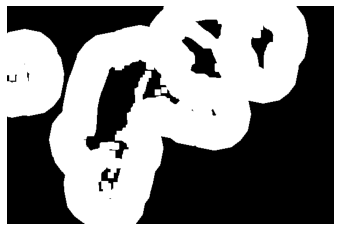

In [238]:
unknown = cv.subtract(bg,fg)

plt.imshow(unknown, cmap='gray')
plt.axis(False)
plt.show()

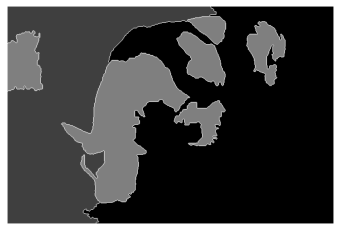

In [239]:
_, marker = cv.connectedComponents(fg)
marker = marker+1
marker[unknown == 255] = 0
marker = cv.watershed(resized,marker)
resized[marker == -1] = [0,0,255]

plt.imshow(marker, cmap='binary')
plt.axis(False)
plt.show()

In [220]:
cv.imwrite("Redmensionado.jpeg", marker)
px = marker[179,115]
print(px)

2
